<h1>Multi-class classification</h1>

<h2>Importing data</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [5]:
file_path =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<h2>Exploraory data analysis</h2>

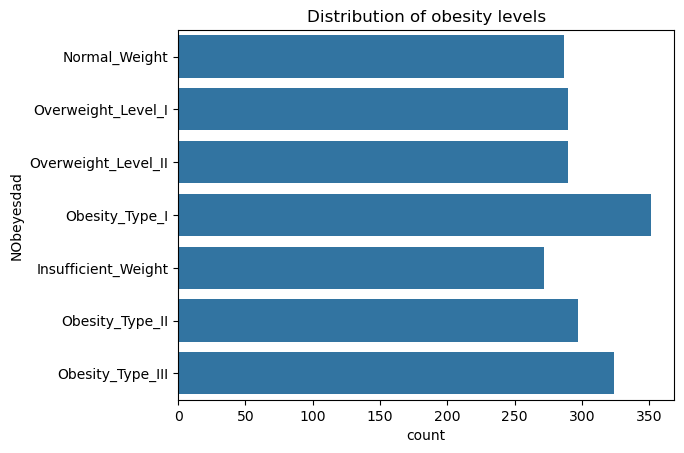

In [6]:
sns.countplot(y='NObeyesdad', data = data)
plt.title('Distribution of obesity levels')
plt.show()


In [7]:
print(data.isnull().sum())

print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

<h2>Preprocessing the data</h2>

<h3>Feature Scaling</h3>

In [11]:
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

scaled_df = pd.DataFrame(scaled_features, columns = scaler.get_feature_names_out(continuous_columns))

scaled_data = pd.concat([data.drop(columns= continuous_columns), scaled_df], axis =1)

<h3>One-hot encoding</h3>

In [16]:
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')

encoder = OneHotEncoder(sparse_output = False, drop ='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

encoded_df = pd.DataFrame(encoded_features,columns = encoder.get_feature_names_out(categorical_columns))

prepped_data = pd.concat([scaled_data.drop(columns = categorical_columns),encoded_df],axis =1)

<h3>Encode target variable</h3>

In [18]:
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<h3>Seprate input and target data</h3>

In [19]:
X= prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

<h2>Model Training and evaluation</h2>

<h3>Splitting the dataset</h3>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42,stratify =y)

<h2>Logistic Regression with One-vs-all</h2>

<h3>Train logistic regression model and evaluate its performance</h3>

In [22]:
model_ova = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

<h3>Evaluation accuracy of the trained model as its performance on unseen testing data</h3>

In [23]:
y_pred_ova = model_ova.predict(X_test)

print('One vs all strategy')
print(f'accuracy:{np.round(100*accuracy_score(y_test,y_pred_ova),2)}%')

One vs all strategy
accuracy:76.12%


<h2>Logistic Regression with One-vs-One</h2>

<h3>Train logistic regression model and evaluate its performance</h3>

In [24]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

<h3>Evaluation accuracy of the trained model as its performance on unseen testing data</h3>

In [26]:
y_pred_ovo = model_ovo.predict(X_test)
print('One - vs - One strategy')
print(f'accuracy: {np.round(100*accuracy_score(y_test,y_pred_ovo),2)}%')

One - vs - One strategy
accuracy: 92.2%


<h2>Changing the test size in train_test_split method and observe impact on model performance</h2>

In [27]:
for test_size in [0.1,0.3]:
    X_train,X_test, y_train,y_test = train_test_split(X,y,test_size= test_size,random_state=42,stratify=y)
    model_ova.fit(X_train,y_train)
    y_pred = model_ova.predict(X_test)
    print(f'Test Size:{test_size}')
    print('Accuracy:', accuracy_score(y_test,y_pred))

Test Size:0.1
Accuracy: 0.7594339622641509
Test Size:0.3
Accuracy: 0.749211356466877


<h2>Plotting bar chart for feature importance using coefficients from One vs all logistics ragression model </h2>

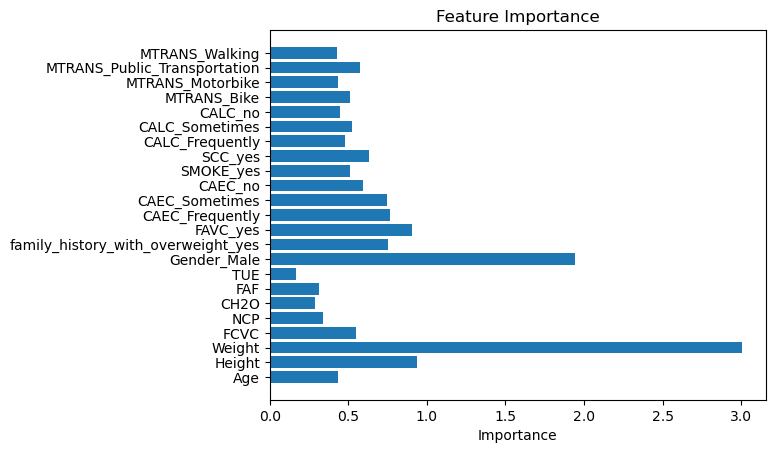

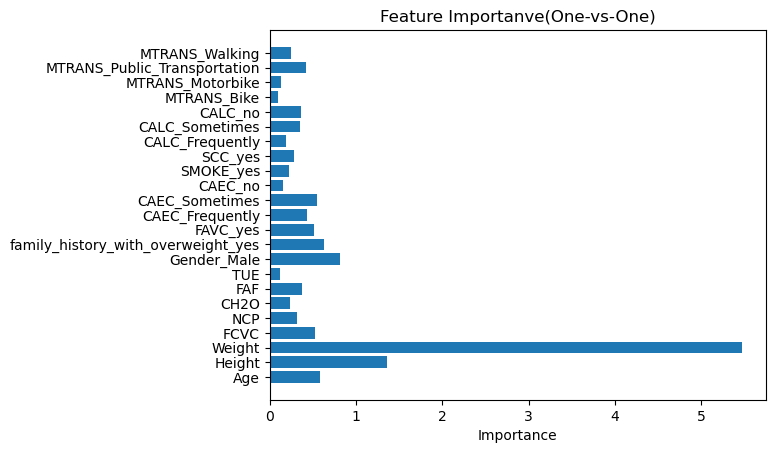

In [30]:
feature_importance = np.mean(np.abs(model_ova.coef_),axis=0)
plt.barh(X.columns,feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

feature_importance = np.mean(np.abs(coefs), axis=0)
plt.barh(X.columns, feature_importance)
plt.title('Feature Importanve(One-vs-One)')
plt.xlabel('Importance')
plt.show()